In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [3]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[0]

In [4]:
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
Date,,,
2021-03-13,1223057.0,1714372,2634215
2021-03-12,1357111.0,1788456,2503924
2021-03-11,1284271.0,1702686,2187298
2021-03-10,955177.0,1617220,2122898
2021-03-09,823210.0,1909363,2378673
...,...,...,...
2020-08-30,NaN,807695,1887845
2020-08-29,NaN,591734,1954902
2020-08-28,NaN,738873,2658558


In [5]:
df['Difference in Travelers 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput'])
df['Difference in Travelers 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput'])
df['% Change 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput']).div(df['2020 Traveler Throughput'])
df['% Change 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput']).div(df['2019 Traveler Throughput'])

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput,Difference in Travelers 2021 vs 2020,Difference in Travelers 2020 vs 2019,% Change 2021 vs 2020,% Change 2020 vs 2019
Date,,,,,,,
2021-03-13,1223057.0,1714372,2634215,-491315.0,-919843,-0.286586,-0.349191
2021-03-12,1357111.0,1788456,2503924,-431345.0,-715468,-0.241183,-0.285739
2021-03-11,1284271.0,1702686,2187298,-418415.0,-484612,-0.245738,-0.221557
2021-03-10,955177.0,1617220,2122898,-662043.0,-505678,-0.409371,-0.238202
2021-03-09,823210.0,1909363,2378673,-1086153.0,-469310,-0.568856,-0.197299
...,...,...,...,...,...,...,...
2020-08-30,NaN,807695,1887845,NaN,-1080150,NaN,-0.572160
2020-08-29,NaN,591734,1954902,NaN,-1363168,NaN,-0.697308
2020-08-28,NaN,738873,2658558,NaN,-1919685,NaN,-0.722078


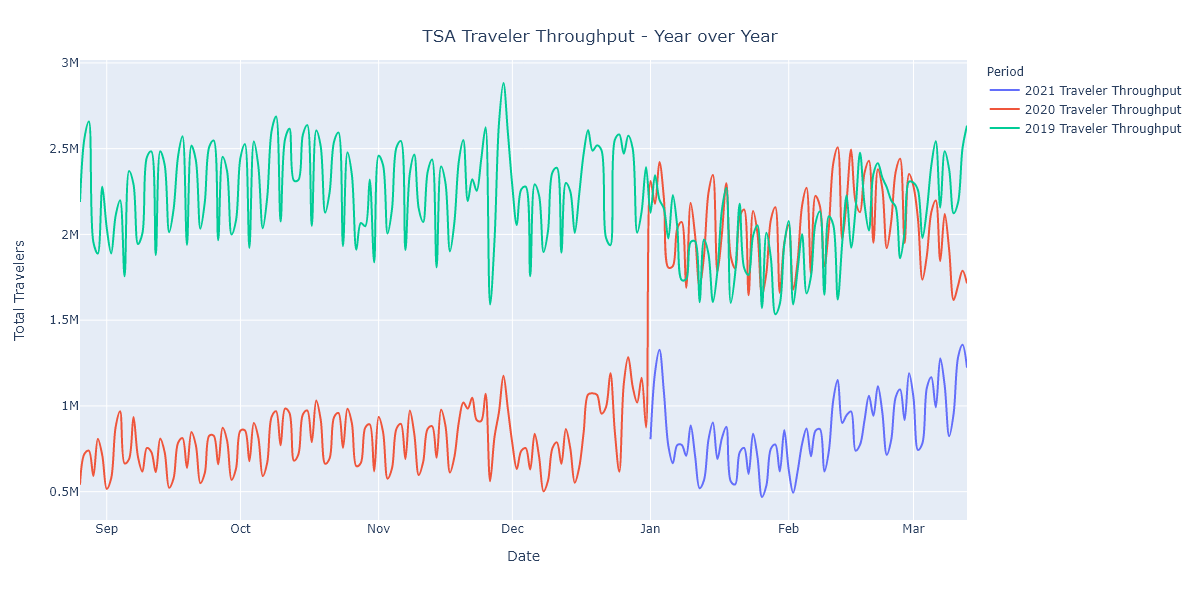

In [22]:
fig = px.line(df, y=['2021 Traveler Throughput',
                     '2020 Traveler Throughput',
                     '2019 Traveler Throughput'],
              line_shape='spline',
              labels={'value':'Total Travelers',
                      'variable':'Period'})

fig.update_layout(
    title={'text':'TSA Traveler Throughput - Year over Year',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.update_xaxes(tickformat='%b\n')

fig.show(renderer='png', height=600, width=1200)